In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_excel('Insurance_data.xlsx')

In [3]:
data

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [5]:
data.dtypes

age                 int64
bought_insurance    int64
dtype: object

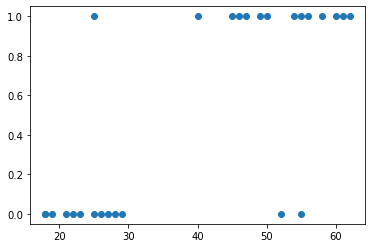

In [6]:
plt.scatter(data.age,data.bought_insurance)

In [7]:
data.shape

(27, 2)

In [10]:
X=data.iloc[:,:1]

In [11]:
X.shape

(27, 1)

In [12]:
y=data.iloc[:,1:]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [16]:
lg.fit(X_train,y_train)

C:\Users\Amar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [19]:
pred=lg.predict(X_test)

In [18]:
X_test

,age
8,62
13,29
9,61
21,26
0,22
11,28


In [21]:
lg.score(X_test,pred)

1.0

In [22]:
lg.predict_proba(X_test)

array([[0.05428681, 0.94571319],
       [0.70555426, 0.29444574],
       [0.06039343, 0.93960657],
       [0.77085061, 0.22914939],
       [0.84096546, 0.15903454],
       [0.72848825, 0.27151175]])

In [26]:
lg.predict([[25]])

array([0], dtype=int64)

## Multiclass Classification Problem

In [27]:
from sklearn.datasets import load_digits

In [28]:
digits=load_digits()

In [29]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [31]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

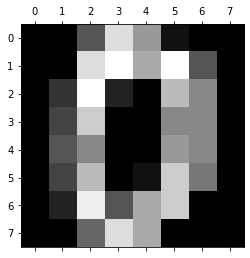

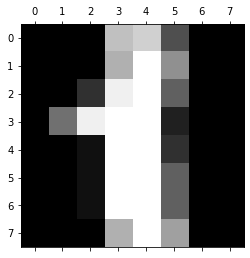

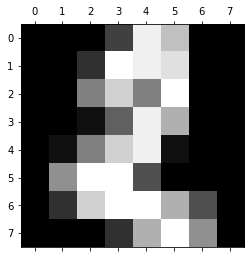

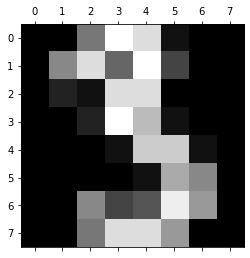

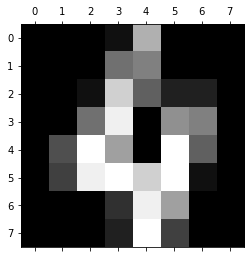

In [33]:
plt.gray()
for i in range(0,5):
    plt.matshow(digits.images[i])

In [34]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.33, random_state=42)

In [38]:
len(X_train) 

1203

In [39]:
len(X_test)

594

In [40]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [41]:
model.fit(X_train,y_train)

C:\Users\Amar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

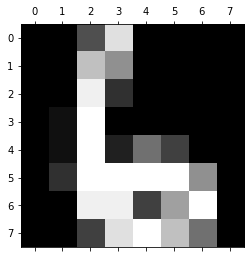

In [42]:
plt.matshow(digits.images[67])

In [43]:
digits.target[67]

6

In [44]:
model.score(X_test,y_test)

0.9629629629629629

In [45]:
model.predict([digits.data[67]])

array([6])

In [48]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [49]:
pred=model.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)

In [52]:
cm

array([[55,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  1,  0,  1,  0,  0,  1,  2,  1],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 54,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 62,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 69,  1,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 60,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 50,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  2, 65]], dtype=int64)

Text(33.0, 0.5, 'Truth')

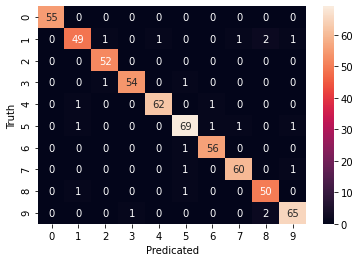

In [57]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicated')
plt.ylabel('Truth')